<hr style="color:green" />
<h1 style="color:green">COSC2673 Assignment 2: Image Classification for Cancerous Cells</h1>
<h2 style="color:green">File 02: Image Data Load for Extra Label</h2>
<hr style="color:green" />

<p>
In this file, load the image data files for the Extra File, and convert them in memory to a format that is machine learnable, and write to file
</p>

In [3]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from PIL import Image
import glob

import pandas as pd


import data_basic_utility as dbutil
import graphing_utility as graphutil
import statistics_utility as statsutil

tf.__version__
randomSeed = dbutil.get_random_seed()

First, Load the Main Label data

In [4]:
# Use these locations for Google Colab, where we need the Github version of the file
# locationMain = "https://raw.githubusercontent.com/s2105802-Nelson/COSC2673-A2-Group42/main/Image_classification_data/data_labels_mainData.csv?token=GHSAT0AAAAAACBUMPCH5CK2I562VIUK4US4ZCB3SFQ"

# Use these locations for Nelson's local version of the file
locationExtra = "./Image_classification_data/data_labels_extraData.csv"
imageFolderPath = "./Image_classification_data/patch_images/"

dfExtra = pd.read_csv(locationExtra)

# Initialize the Cell Type Name column and the Cell Type column to be "null" values, so that it can be consisent in structure with the Main data
dfExtra["cellTypeName"] = ""
dfExtra["cellType"] = -1

dfExtra.head()

,InstanceID,patientID,ImageName,isCancerous,cellTypeName,cellType
0,12681,61,12681.png,0,,-1
1,12682,61,12682.png,0,,-1
2,12683,61,12683.png,0,,-1
3,12684,61,12684.png,0,,-1
4,12685,61,12685.png,0,,-1


Do a Train/Validate/Test split of size 60/20/20

In [5]:
lstIds = dfExtra["InstanceID"]

# Assume that the Validation and Test Splits will be the same size, set this so we have a 60/20/20 split
train_size = 0.6

lstTrainIds, lstValTestIds = train_test_split(lstIds, test_size=(1-train_size), random_state=randomSeed)
lstValIds, lstTestIds = train_test_split(lstValTestIds, test_size=0.5, random_state=randomSeed)

print(len(lstTrainIds))
print(len(lstValIds))
print(len(lstTestIds))

# Spot check the Test Ids
print("Test Ids:")
print(lstTestIds)

6230
2077
2077
Test Ids:
4144     10785
10151    15603
7137     12346
7560      7420
10367    20016
         ...  
8217     14979
590      11658
5233     15223
4010     10636
10343    19988
Name: InstanceID, Length: 2077, dtype: int64


Now, Loop through the Image folder. Load the image data but only if it exists in the main label data

In [7]:
lstImages = []

stepCount = 0
for filepath in glob.glob(imageFolderPath + '*.png', recursive=True): #assuming gif
    # Get the name of the file
    filename = filepath.split("\\")[-1]

    # Check if there is a matching record in the Extra Label data, if so, add it to the dataframe
    isCancerous = -1
    cellType = -1
    trainValTest = 0
    dfLabelRecs = dfExtra[dfExtra["ImageName"] == filename]
    
    if dfLabelRecs.shape[0] > 0:
        # found a record, get the labels and append it with the file to the list
        isCancerous = dfLabelRecs.iloc[0]["isCancerous"]
        cellType = dfLabelRecs.iloc[0]["cellType"]
        id = dfLabelRecs.iloc[0]["InstanceID"]

        if id in lstValIds:
            trainValTest = 1
        elif id in lstTestIds:
            trainValTest = 2

        lstImages.append((filepath, isCancerous, cellType, trainValTest))

        # Print just the first 10 of the data where the image was found to ensure we are on track
        stepCount += 1
        if stepCount < 10:
            print(filename + ", isCancerous=" + str(isCancerous) + ", cellType=" + str(cellType))

10246.png, isCancerous=0, cellType=-1
10247.png, isCancerous=0, cellType=-1
10248.png, isCancerous=0, cellType=-1
10249.png, isCancerous=0, cellType=-1
10250.png, isCancerous=0, cellType=-1
10251.png, isCancerous=0, cellType=-1
10252.png, isCancerous=0, cellType=-1
10253.png, isCancerous=0, cellType=-1
10254.png, isCancerous=0, cellType=-1


In [8]:
# Create a data frame
dfImages = pd.DataFrame(data=lstImages, columns=['ImageName', 'isCancerous', 'cellType', 'trainValTest'])
dfImages.head()

,ImageName,isCancerous,cellType,trainValTest
0,./Image_classification_data/patch_images\10246...,0,-1,1
1,./Image_classification_data/patch_images\10247...,0,-1,0
2,./Image_classification_data/patch_images\10248...,0,-1,2
3,./Image_classification_data/patch_images\10249...,0,-1,0
4,./Image_classification_data/patch_images\10250...,0,-1,0


Plot some random images and review

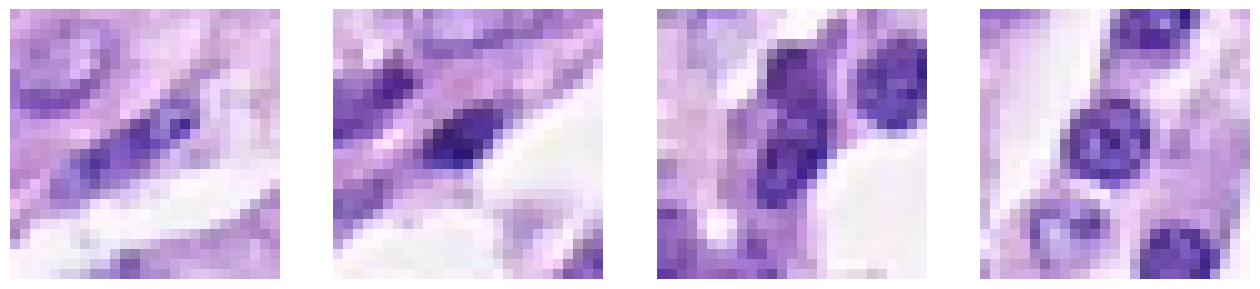

In [9]:
r_inx = np.random.choice(100, 4)
rand_data = dfImages.loc[r_inx,'ImageName']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

Write the images dataframe to file, that can be used by other tensorflow models later


In [10]:
dfImages.to_csv("images_extra.csv", index=False)